In [1]:
import cv2
import mediapipe as mp

# 눈 위치에 주사위 붙이기 (스티커 사진)

In [1]:
import cv2
import mediapipe as mp

dice = cv2.imread('./data/images/dice.png', cv2.IMREAD_UNCHANGED)
dice = cv2.resize(dice, dsize=(0,0), fx=0.1, fy=0.1)
w, h = dice.shape[1], dice.shape[0]

mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

while True:
    ret, frame = cap.read()
    if not ret:
        print('프레임 획득에 실패하여 종료합니다.')
        break
    
    res = face_detection.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    if res.detections:
        for det in res.detections:
            p = mp_face_detection.get_key_point(det, mp_face_detection.FaceKeyPoint.RIGHT_EYE)
            x1, x2 = int(p.x*frame.shape[1]-w//2), int(p.x*frame.shape[1]+w//2)
            y1, y2 = int(p.y*frame.shape[0]-h//2), int(p.y*frame.shape[0]+h//2)
            if x1 > 0 and y1 > 0 and x2 < frame.shape[1] and y2 < frame.shape[0]:
                alpha = dice[:,:,3:]/255 # 투명도를 나타내는 알파채널값
                frame[y1:y2, x1:x2] = frame[y1:y2, x1:x2] * (1-alpha) + dice[:,:,:3]*alpha
    
    cv2.imshow('MediaPipe Face AR', cv2.flip(frame, 1))
    if cv2.waitKey(5) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [4]:
import cv2
import mediapipe as mp

# 주사위 이미지 불러오기
dice = cv2.imread('./data/images/dice.png', cv2.IMREAD_UNCHANGED)
dice = cv2.resize(dice, dsize=(0, 0), fx=0.1, fy=0.1)
w, h = dice.shape[1], dice.shape[0]

# MediaPipe 모듈 초기화
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

# 얼굴 감지 모델 초기화
face_detection = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5)

# 비디오 캡처 객체 초기화
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

while True:
    # 비디오 프레임 읽어오기
    ret, frame = cap.read()
    if not ret:
        print('프레임 획득에 실패하여 종료합니다.')
        break
    
    # 프레임을 RGB 형식으로 변환하여 얼굴 감지 수행
    res = face_detection.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    if res.detections:
        for det in res.detections:
            # 오른쪽 눈 위치 추출
            p = mp_face_detection.get_key_point(det, mp_face_detection.FaceKeyPoint.RIGHT_EYE)
            x1, x2 = int(p.x * frame.shape[1] - w // 2), int(p.x * frame.shape[1] + w // 2)
            y1, y2 = int(p.y * frame.shape[0] - h // 2), int(p.y * frame.shape[0] + h // 2)
            
            # 주사위 이미지가 프레임 내에 완전히 포함되는 경우에만 적용
            if x1 > 0 and y1 > 0 and x2 < frame.shape[1] and y2 < frame.shape[0]:
                alpha = dice[:, :, 3:] / 255  # 투명도를 나타내는 알파 채널 값
                frame[y1:y2, x1:x2] = frame[y1:y2, x1:x2] * (1 - alpha) + dice[:, :, :3] * alpha
    
    # 결과 프레임을 화면에 출력
    cv2.imshow('MediaPipe Face AR', cv2.flip(frame, 1))
    
    # 'q' 키를 누르면 종료
    if cv2.waitKey(5) == ord('q'):
        break

# 비디오 캡처 객체 해제
cap.release()

# 모든 창 닫기
cv2.destroyAllWindows()


# 얼굴 동작 검출

In [2]:
import cv2
import mediapipe as mp

mp_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
mp_styles = mp.solutions.drawing_styles

mesh = mp_mesh.FaceMesh(max_num_faces=2, \
                        refine_landmarks=True, \
                        min_detection_confidence=0.5, \
                        min_tracking_confidence=0.5)

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

while True:
    ret, frame = cap.read()
    if not ret:
        print('프레임 획득에 실패하여 종료합니다.')
        break

    res = mesh.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    if res.multi_face_landmarks:
        for landmarks in res.multi_face_landmarks:
            mp_drawing.draw_landmarks(  image=frame, landmark_list=landmarks, \
                                        connections=mp_mesh.FACEMESH_TESSELATION, \
                                        landmark_drawing_spec=None, \
                                        connection_drawing_spec=mp_styles.get_default_face_mesh_tesselation_style())

            mp_drawing.draw_landmarks(  image=frame, landmark_list=landmarks, \
                                        connections=mp_mesh.FACEMESH_CONTOURS, \
                                        landmark_drawing_spec=None, \
                                        connection_drawing_spec=mp_styles.get_default_face_mesh_contours_style())
            
            mp_drawing.draw_landmarks(  image=frame, landmark_list=landmarks, \
                                        connections=mp_mesh.FACEMESH_IRISES, \
                                        landmark_drawing_spec=None, \
                                        connection_drawing_spec=mp_styles.get_default_face_mesh_iris_connections_style())
    
    cv2.imshow('MediaPipe Face Mesh', cv2.flip(frame, 1)) # 좌우반전
    if cv2.waitKey(5) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [5]:
import cv2
import mediapipe as mp

# MediaPipe 모듈 초기화
mp_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
mp_styles = mp.solutions.drawing_styles

# Face Mesh 모델 초기화
mesh = mp_mesh.FaceMesh(max_num_faces=2, refine_landmarks=True, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# 비디오 캡처 객체 초기화
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

while True:
    # 비디오 프레임 읽어오기
    ret, frame = cap.read()
    if not ret:
        print('프레임 획득에 실패하여 종료합니다.')
        break

    # 프레임을 RGB 형식으로 변환하여 Face Mesh 적용
    res = mesh.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    if res.multi_face_landmarks:
        for landmarks in res.multi_face_landmarks:
            # Face Mesh 그리기 - 메쉬 선분
            mp_drawing.draw_landmarks(image=frame, landmark_list=landmarks,
                                      connections=mp_mesh.FACEMESH_TESSELATION,
                                      landmark_drawing_spec=None,
                                      connection_drawing_spec=mp_styles.get_default_face_mesh_tesselation_style())

            # Face Mesh 그리기 - 얼굴 윤곽
            mp_drawing.draw_landmarks(image=frame, landmark_list=landmarks,
                                      connections=mp_mesh.FACEMESH_CONTOURS,
                                      landmark_drawing_spec=None,
                                      connection_drawing_spec=mp_styles.get_default_face_mesh_contours_style())
            
            # Face Mesh 그리기 - 홍채
            mp_drawing.draw_landmarks(image=frame, landmark_list=landmarks,
                                      connections=mp_mesh.FACEMESH_IRISES,
                                      landmark_drawing_spec=None,
                                      connection_drawing_spec=mp_styles.get_default_face_mesh_iris_connections_style())
    
    cv2.imshow('MediaPipe Face Mesh', cv2.flip(frame, 1))  # 좌우 반전
    if cv2.waitKey(5) == ord('q'):
        break

# 비디오 캡처 객체 해제
cap.release()

# 모든 창 닫기
cv2.destroyAllWindows()


# 손 동작 검출

In [3]:
import cv2
import mediapipe as mp

mp_hand = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_styles = mp.solutions.drawing_styles

hand = mp_hand.Hands(max_num_hands=2, \
                        static_image_mode=False, \
                        min_detection_confidence=0.5, \
                        min_tracking_confidence=0.5)

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

while True:
    ret, frame = cap.read()
    if not ret:
        print('프레임 획득에 실패하여 종료합니다.')
        break
    
    res = hand.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    if res.multi_hand_landmarks:
        for landmarks in res.multi_hand_landmarks:
            mp_drawing.draw_landmarks(  frame, landmarks, mp_hand.HAND_CONNECTIONS, \
                                        mp_styles.get_default_hand_landmarks_style(), \
                                        mp_styles.get_default_hand_connections_style())
    
    cv2.imshow('MediaPipe Hands', cv2.flip(frame, 1))
    if cv2.waitKey(5) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import mediapipe as mp

# MediaPipe 모듈 초기화
mp_hand = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_styles = mp.solutions.drawing_styles

# Hands 모델 초기화
hand = mp_hand.Hands(max_num_hands=2, static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# 비디오 캡처 객체 초기화
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

while True:
    # 비디오 프레임 읽어오기
    ret, frame = cap.read()
    if not ret:
        print('프레임 획득에 실패하여 종료합니다.')
        break
    
    # 프레임을 RGB 형식으로 변환하여 Hands 적용
    res = hand.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    if res.multi_hand_landmarks:
        for landmarks in res.multi_hand_landmarks:
            # 손 모양 그리기 - 손 landmark 점
            mp_drawing.draw_landmarks(frame, landmarks, mp_hand.HAND_CONNECTIONS,
                                      mp_styles.get_default_hand_landmarks_style(),
                                      mp_styles.get_default_hand_connections_style())
    
    cv2.imshow('MediaPipe Hands', cv2.flip(frame, 1))
    if cv2.waitKey(5) == ord('q'):
        break

# 비디오 캡처 객체 해제
cap.release()

# 모든 창 닫기
cv2.destroyAllWindows()


# 포즈 인식

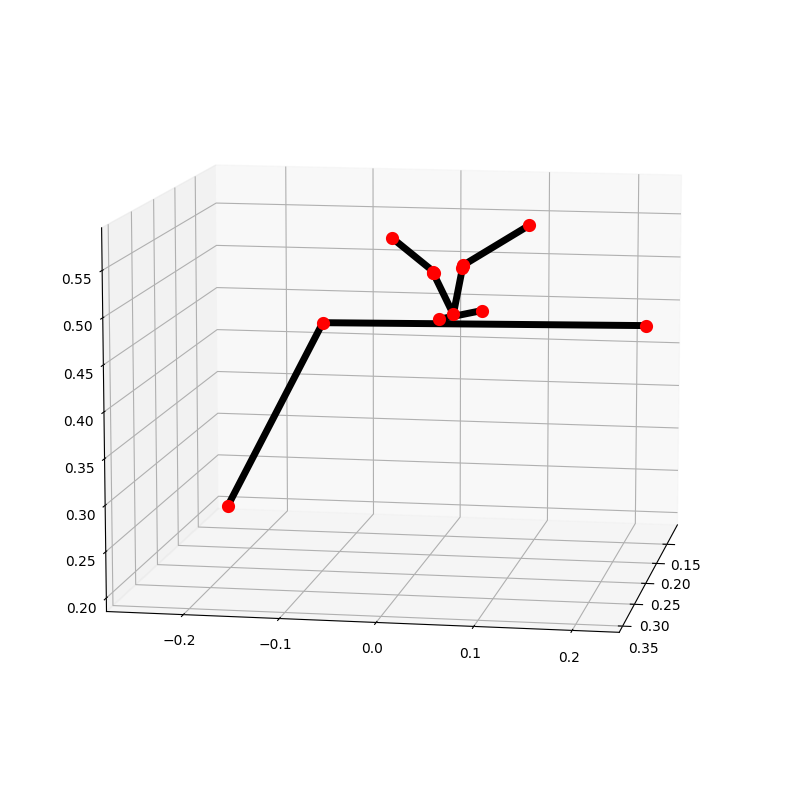

In [4]:
import cv2
import mediapipe as mp

# MediaPipe 모듈 초기화
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
mp_styles = mp.solutions.drawing_styles

# Hands 모델 초기화
pose = mp_pose.Pose(static_image_mode=False,        # 비디오로 적용  
                    enable_segmentation=True,       # 전경과 배경을 분할
                    min_detection_confidence=0.5, \
                    min_tracking_confidence=0.5)

# 비디오 캡처 객체 초기화
cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)


while True:
    # 비디오 프레임 읽어오기
    ret, frame = cap.read()
    if not ret:
        print('프레임 획득에 실패하여 종료합니다.')
        break
    
    # 프레임을 RGB 형식으로 변환하여 Hands 적용
    res = pose.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    
    mp_drawing.draw_landmarks(frame, res.pose_landmarks,
                              mp_pose.POSE_CONNECTIONS,
                              landmark_drawing_spec=mp_styles.get_default_pose_landmarks_style())

    
    cv2.imshow('MediaPipe Pose', cv2.flip(frame, 1))
    if cv2.waitKey(5) == ord('q'):
        mp_drawing.plot_landmarks(res.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
        break

# 비디오 캡처 객체 해제
cap.release()

# 모든 창 닫기
cv2.destroyAllWindows()

# 수화 인식

### 데이터 셋 만들기

In [5]:
import cv2
import mediapipe as mp
import numpy as np
import time, os

# 학습시킬 데이터 지정
actions = ['zero', 'one', 'two', 'three', 'four', 'five']
seq_length = 30 # window의 사이즈
secs_for_action = 30 # 하나의 제스쳐를 찍는데 걸리는 시간

# MediaPipe hands model

# 초기화
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(
    max_num_hands = 1, # 몇 개의 손을 인식할 것인지
    min_detection_confidence = 0.5,
    min_tracking_confidence = 0.5)

# 웹캠 열기
cap = cv2.VideoCapture(0)

created_time = int(time.time())
os.makedirs('dataset', exist_ok=True) # 데이터 셋을 저장할 폴더 만들기

# 웹캠을 열어서 데이터 모으기
while cap.isOpened():
    for idx, action in enumerate(actions):
        data = []

        # 이미지 읽기
        ret, img = cap.read()

        # flip, 웹캠 이미지가 거울처럼 나타나기 때문
        img = cv2.flip(img, 1)

        # 어떤 제스쳐를 학습시킬 것인지 표시
        cv2.putText(img, f'Waiting for collecting {action.upper()} action...', org=(10,30),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255,255,255), thickness=2)
        
        #3초동안 대기
        cv2.imshow('img', img)
        cv2.waitKey(3000)

        start_time = time.time()
        
        #30초동안 촬영
        while time.time() - start_time < secs_for_action:
            ret, img = cap.read()

            img = cv2.flip(img, 1)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # opencv는 기본적으로 BGR로 영상을 읽기 때문에 RGB로 바꿔야 함
            result = hands.process(img) # RGB로 바꾼 데이터를 result에 저장
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

            if result.multi_hand_landmarks is not None:
                for res in result.multi_hand_landmarks:
                    joint = np.zeros((21,4))
                    for j,lm in enumerate(res.landmark):
                        joint[j] = [lm.x, lm.y, lm.z, lm.visibility] # 각 점의 x, y, z 좌표 & 점이 이미지 상에서 보이는지 안 보이는지

                    # 점들 간의 각도 계산하기
                    v1 = joint[[0,1,2,3,0,5,6,7,0,9,10,11,0,13,14,15,0,17,18,19], :3] # Parent joint
                    v2 = joint[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], :3] # Child joint
                    v = v2 - v1 # v2와 v1 사이의 벡터 구하기

                    # 벡터 정규화 시키기(단위 벡터 구하기)
                    v = v / np.linalg.norm(v, axis=1)[:, np.newaxis]

                    # 점곱을 구한 다음 arccos으로 각도 구하기
                    angle = np.arccos(np.einsum('nt,nt->n',
                        v[[0,1,2,4,5,6,8,9,10,12,13,14,16,17,18],:], 
                        v[[1,2,3,5,6,7,9,10,11,13,14,15,17,18,19],:])) # [15,]

                    angle = np.degrees(angle) # 라디안을 각도로 바꾸기

                    angle_label = np.array([angle], dtype=np.float32)
                    angle_label = np.append(angle_label, idx) # 라벨 추가

                    d = np.concatenate([joint.flatten(), angle_label])

                    data.append(d)

                    mp_drawing.draw_landmarks(img, res, mp_hands.HAND_CONNECTIONS) # 랜드마크 그리기
            
            cv2.imshow('img', img)
            if cv2.waitKey(1) == ord('q'):
                break

        data = np.array(data)
        print(action, data.shape)
        np.save(os.path.join('dataset', f'raw_{action}_{created_time}'),data)

        # 시퀀스 데이터로 변환
        full_seq_data = []
        for seq in range(len(data) - seq_length):
            full_seq_data.append(data[seq:seq + seq_length])

        full_seq_data = np.array(full_seq_data)
        print(action, full_seq_data.shape)
        np.save(os.path.join('dataset', f'seq_{action}_{created_time}'), full_seq_data)
    break

cap.release()
cv2.destroyAllWindows()

zero (901, 100)
zero (871, 30, 100)
one (901, 100)
one (871, 30, 100)
two (901, 100)
two (871, 30, 100)
three (901, 100)
three (871, 30, 100)
four (903, 100)
four (873, 30, 100)
five (901, 100)
five (871, 30, 100)


### 학습

In [1]:
import numpy as np
from tensorflow import keras
from keras.utils import to_categorical

actions = ['zero',
          'one',
          'tow',
          'three',
          'four',
          'five']

# numpy 배열 합치기
data = np.concatenate([np.load('./dataset/seq_zero_1689059738.npy'),
                       np.load('./dataset/seq_one_1689059738.npy'),
                       np.load('./dataset/seq_two_1689059738.npy'),
                       np.load('./dataset/seq_three_1689059738.npy'),
                       np.load('./dataset/seq_four_1689059738.npy'),
                       np.load('./dataset/seq_five_1689059738.npy')], axis=0)

print(data.shape)

(5228, 30, 100)


In [7]:
# data의 마지막 값이 라벨이므로 x_data와 labels로 나눈기
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

# One-hot 인코딩
y_data = to_categorical(labels, num_classes=len(actions))
print(y_data.shape)

(5228, 30, 99)
(5228,)
(5228, 6)


In [15]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

from keras.models import Sequential
from keras.layers import LSTM, Dense
                    # input_shape = [30, 99], 30 : 윈도우의 크기, 99 : 랜드마크, visibility, 각도
model = Sequential([LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
                    Dense(32, activation='relu'),
                    Dense(len(actions), activation='softmax')])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(x_train, 
                    y_train, 
                    validation_data=(x_val, y_val),
                    epochs=200,
                    callbacks=[ModelCheckpoint('./dataset/models/modelver2.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto'),
                               ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=50, verbose=1, mode='auto')])

(4705, 30, 99) (4705, 6)
(523, 30, 99) (523, 6)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                41984     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 6)                 198       
                                                                 
Total params: 44,262
Trainable params: 44,262
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
147/148 [============================>.] - ETA: 0s - loss: 25.7375 - accuracy: 0.5912
Epoch 1: val_accuracy improved from -inf to 0.84130, saving model to ./dataset/models\modelver2.h5
148/148 [==============================] - 5s 31ms/step - loss: 25.73

KeyboardInterrupt: 

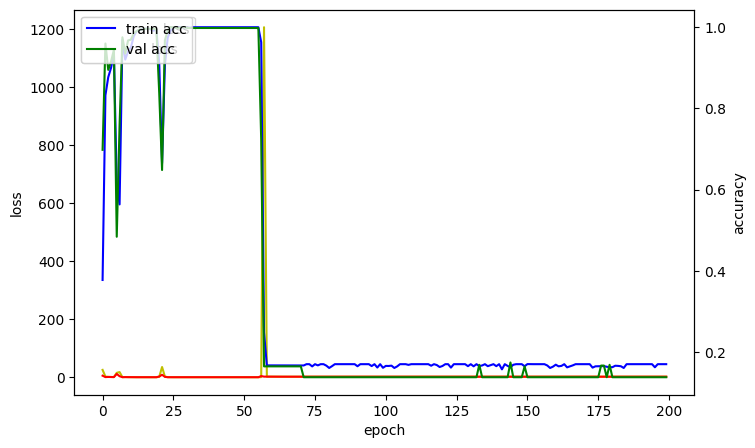

In [13]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(8, 5))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

### 테스트

In [17]:
import cv2
import mediapipe as mp
import numpy as np
from tensorflow import keras
from keras.models import load_model

actions = ['zero', 'one', 'two', 'three', 'four', 'five']
seq_length = 30

model = load_model('./dataset/models/model.h5')

# MediaPipe hands model (초기화)
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

hands = mp_hands.Hands(
    max_num_hands = 1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

# 웹캠 열기
cap = cv2.VideoCapture(0)

seq = []
action_seq = []

while cap.isOpened():
    ret, img = cap.read()
    img0 = img.copy()

    img = cv2.flip(img, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    result = hands.process(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    if result.multi_hand_landmarks is not None:
        for res in result.multi_hand_landmarks:
            joint = np.zeros((21,4))
            for j, lm in enumerate(res.landmark):
                joint[j] = [lm.x, lm.y, lm.z, lm.visibility]

            # 점들 간의 각도 계산하기
            v1 = joint[[0,1,2,3,0,5,6,7,0,9,10,11,0,13,14,15,0,17,18,19], :3] # Parent joint
            v2 = joint[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], :3] # Child joint
            v = v2 - v1 # v2와 v1 사이의 벡터 구하기

            # 점곱을 구한 다음 arccos으로 각도 구하기
            v = v / np.linalg.norm(v, axis=1)[:, np.newaxis]

            # Get angle using arcos of dot product
            angle = np.arccos(np.einsum('nt,nt->n',
                v[[0,1,2,4,5,6,8,9,10,12,13,14,16,17,18],:], 
                v[[1,2,3,5,6,7,9,10,11,13,14,15,17,18,19],:])) # [15,]

            angle = np.degrees(angle) # 라디안을 각도로 바꾸기

            d = np.concatenate([joint.flatten(), angle])


            seq.append(d)

            mp_drawing.draw_landmarks(img, res, mp_hands.HAND_CONNECTIONS)

            if len(seq) < seq_length:
                continue

            input_data = np.expand_dims(np.array(seq[-seq_length:], dtype=np.float32), axis=0)

            # 모델 예측
            y_pred = model.predict(input_data).squeeze()

            # 예측한 값의 인덱스 구하기
            i_pred = int(np.argmax(y_pred))
            conf = y_pred[i_pred]

            # confidence가 0.9보다 작으면
            if conf < 0.9:
                continue # 제스쳐 인식 못 한 상황으로 판단

            action = actions[i_pred]
            action_seq.append(action) # action_seq에 action을 저장
            #print(action_seq)
            # 보인 제스쳐의 횟수가 3 미만인 경우에는 계속
            if len(action_seq) < 3:
                continue
            # 제스쳐 판단 불가이면 this_action은 ?
            this_action = '?'
            # 만약 마지막 3개의 제스쳐가 같으면 제스쳐가 제대로 취해졌다고 판단
            if action_seq[-1] == action_seq[-2] == action_seq[-3]:
                this_action = action
                print(this_action)
            # 텍스트 출력
            cv2.putText(img, f'{this_action.upper()}', org=(int(res.landmark[0].x * img.shape[1]), 
                                                            int(res.landmark[0].y * img.shape[0] + 20)), 
                                                            fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, 
                                                            color=(255, 255, 255), thickness=2)
    # out.write(img0)
    # out2.write(img)
    cv2.imshow('img', img)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 17ms/step
zero
1/1 [==============================] - 0s 19ms/step
zero
1/1 [==============================] - 0s 18ms/step
zero
1/1 [==============================] - 0s 18ms/step
zero
1/1 [==============================] - 0s 21ms/step
zero
1/1 [==============================] - 0s 20ms/step
zero
1/1 [==============================] - 0s 18ms/step
zero
1/1 [==============================] - 0s 18ms/step
zero
1/1 [==============================] - 0s 20ms/step
zero
1/1 [==============================] - 0s 20ms/step
zero
1/1 [==============================] - 0s 19ms/step
zero
1/1 [==============================] - 0s 21ms/step
zero
1/1 [==============================] - 0s 18ms/step
zero
1/1 [==============================] - 0s 19ms/step
zero
1/1 [==============================] - 0s 21ms/step
zero
1/1 [==============================] - 0s 19ms/step
zero
1/1 [==============================] - 0s 22ms/step
zero
1/1 [==========================